## 6.7 树的遍历

我们已经见到了树数据结构的基本功能，现在是看树的一些额外使用模式的时候了。这些使
用模式可以分为我们访问树节点的三种方式。有三种常用的模式来访问树中的所有节点。这
些模式之间的差异是每个节点被访问的顺序。我们称这种访问节点方式为“遍历”。我们将看到
三种遍历方式称为 前序，中序 和 后序 。让我们更仔细地定义这三种遍历方式，然后看看这些
模式有用的一些例子。

### 前序
在前序遍历中，我们首先访问根节点，然后递归地做左侧子树的前序遍历，随后是右侧
子树的递归前序遍历。

### 中序 
在一个中序遍历中，我们递归地对左子树进行一次遍历，访问根
节点，最后递归遍历右子树。

### 后序 
在后序遍历中，我们递归地对左子树和右子树进行后序遍历，然后访问根节点。

让我们看一些例子，来说明这三种遍历。首先看前序遍历。作为遍历的树的示例，我们将把
这本书表示为树。这本书是树的根，每一章都是根节点的一个孩子。章节中的每个章节都是
章节的子节点，每个小节都是章节的子节点，依此类推。Figure 5 展示了一本只有两章的书
的有限版本。注意，遍历算法适用于具有任意数量子节点的树，但是我们现在使用二叉树。

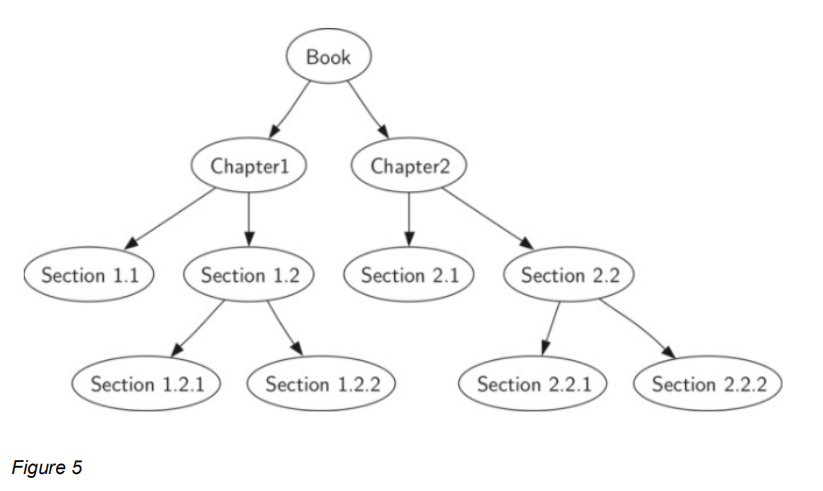

假设你想从前到后读这本书。前序遍历给你正确的顺序。从树的根（Book节点）开始，我们
将遵循前序遍历指令。我们递归调用左孩子的 preorder ，在这种情况下是 Chapter1 。我们
再次递归调用左孩子的 preorder 来得到 Section 1.1 。由于 Section 1.1 没有子节点，我
们不再进行任何额外的递归调用。当我们完成 Section 1.1 ，我们将树向上移动
到 Chapter1 。此时，我们仍然需要访问 Chapter1 的右子树 Section 1.2 。和前面一样，我们访问左子树，它将我们带到 Section 1.2.1 ，然后访问 Section 1.2.2 。在 Section 1.2
完成后，我们返回到 Chapter1 。然后，我们返回到 Book 节点，并按照相同过程遍历
Chapter2 。

编写树遍历的代码惊人地优雅，主要是因为遍历是递归写的。Listing 2 展示了用于二叉树的
前序遍历的 Python 代码。

你可能想知道，编写像前序遍历算法的最好方法是什么？是一个简单地使用树作为数据结构
的函数，还是树数据结构本身的方法？Listing 2 展示了作为外部函数编写的前序遍历的版
本，它将二叉树作为参数。外部函数特别优雅，因为我们的基本情况只是检查树是否存在。
如果树参数为 None，那么函数返回而不采取任何操作。

In [1]:
# Listing 2


def preorder(tree):
    if tree:
        print(tree.getRootVal())
        preorder(tree.getLeftChild())
        preorder(tree.getRightChild())

我们也可以实现 preorder 作为 BinaryTree 类的方法。Listing 3 中展示了将 preorder 实
现为内部方法的代码。注意当我们将代码从内部移动到外部时会发生什么。 一般来说，我们
只需用 self 替换 tree 。 但是，我们还需要修改基本情况。内部方法必须在进行前序的递
归调用之前检查左和右孩子的存在。

In [2]:
# Listing 3

def preorder(self):
    print(self.key)
    if self.leftChild:
        self.leftChild.preorder()
    if self.rightChild:
        self.rightChild.preorder()

以上哪种方式实现前序最好？ 答案是在这种情况下，实现前序作为外部函数可能更好。原因
是你很少只是想遍历树。在大多数情况下，将要使用其中一个基本的遍历模式来完成其他任
务。 事实上，我们将在下面的例子中看到后序遍历模式与我们前面编写的用于计算分析树的
代码非常接近。 因此，我们用外部函数实现其余的遍历。


Listing 4 中所示的后序遍历算法几乎与前序遍历顺序相同，只是将 print 调用移动到函数的末
尾。

In [3]:
# Listing 4

def postorder(tree):
    if tree != None:
        postorder(tree.getLeftChild())
        postorder(tree.getRightChild())
        print(tree.getRootVal())

我们已经看到了后序遍历的常见用法，即计算分析树。再次回到 Listing 1。 我们所做的是计
算左子树，计算右子树，并通过对操作符的函数调用在根节点中组合它们。假设我们的二叉
树只存储表达式树的数据，让我们重写计算函数，需要更仔细地对 Listing 4中的后序遍历代
码进行建模（参见 Listing 5）。

In [4]:
# Listing 5

def postordereval(tree):
    opers = {'+':operator.add, '-':operator.sub, '*':operator.mul, '/':operator.truediv}
    res1 = None
    res2 = None
    if tree:
        res1 = postordereval(tree.getLeftChild())
        res2 = postordereval(tree.getRightChild())
    if res1 and res2:
        return opers[tree.getRootVal()](res1,res2)
    else:
        return tree.getRootVal()

请注意，Listing 4中的形式与 Listing 5中的形式相同，只是不在函数的末尾打印值，而是返回
它。 这允许我们保存从第 6 行和第 7 行的递归调用返回的值。然后，我们使用这些保存的值
以及第 9 行的运算符一起计算结果。

在本节中我们最终将看到中序遍历。 在中序遍历中，我们访问左子树，其次是根，最后是右
子树。 Listing 6 展示了我们的中序遍历的代码。 注意，在所有三个遍历函数中，我们只是改
变 print 语句相对于两个递归函数调用的位置。

In [5]:
# Listing 6

def inorder(tree):
    if tree != None:
        inorder(tree.getLeftChild())
        print(tree.getRootVal())
        inorder(tree.getRightChild())

如果我们执行一个简单的中序遍历分析树，我们得到没有任何括号的原始表达式。 让我们修
改基本的 inorder 算法，以允许我们恢复表达式的完全括号版本。 我们将对基本模板进行的
唯一修改如下：在递归调用左子树之前打印左括号，并在递归调用右子树后打印右括号。 修
改后的代码如 Listing 7所示。

In [6]:
# Listing 7

def printexp(tree):
    sVal = ""
    if tree:
        sVal = '(' + printexp(tree.getLeftChild())
        sVal = sVal + str(tree.getRootVal())
        sVal = sVal + printexp(tree.getRightChild())+')'
    return sVal